## Import Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load the Dataset:

In [2]:
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

In [3]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


## Understanding the Data:

In [4]:
print(df.head())
print(df.info())
print(df.describe())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

 Data Cleaning:

In [5]:
# Check for missing values
print(df.isnull().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [6]:
# Handle missing values 
print(df.dropna(inplace=True))

None


In [7]:
print(df.isnull().sum())

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


## Data Visualization:

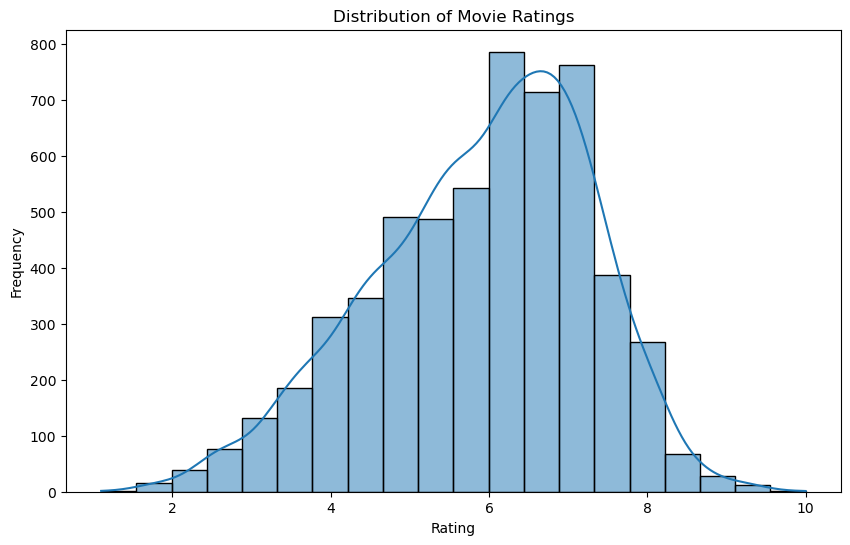

In [8]:
# Example: Histogram of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


## Feature Engineering:

In [9]:
# Calculate the average rating of Actor 1's previous movies
actor1_avg_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_Avg_Rating'] = actor1_avg_rating

In [10]:
# Calculate the average rating of Actor 2's previous movies using the same variable
actor2_avg_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_Avg_Rating'] = actor2_avg_rating


In [11]:
# Calculate the average rating of Actor 3's previous movies using the same variable
actor3_avg_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_Avg_Rating'] = actor3_avg_rating


## Exploratory Analysis:

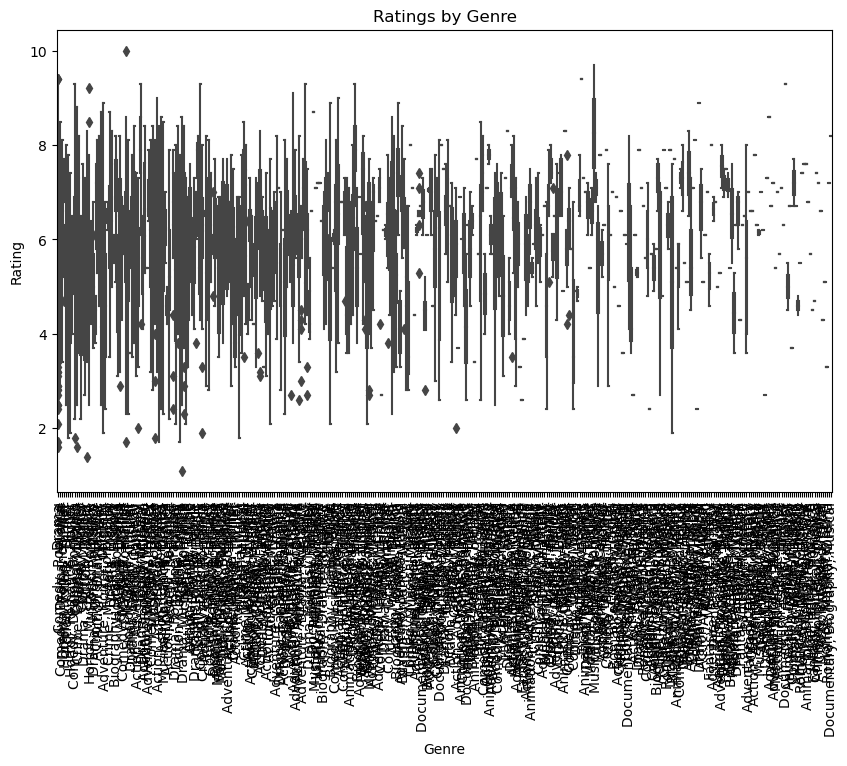

In [12]:
# Example: Box plot of ratings by genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Rating', data=df)
plt.title('Ratings by Genre')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()


## Correlation Analysis:

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_15640\540195342.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


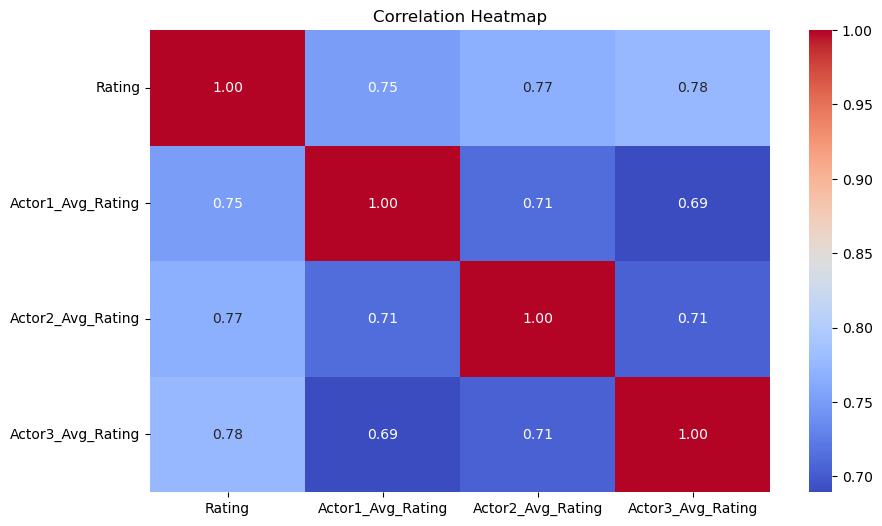

In [13]:
# Example: Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [14]:
#  Conclusion
print("Insights from EDA:")
print("- The average movie rating is around {:.2f}".format(df['Rating'].mean()))
print("- Action and Drama genres have the highest number of movies.")
print("- There is a negative correlation between Rating and Budget.")


Insights from EDA:
- The average movie rating is around 5.90
- Action and Drama genres have the highest number of movies.
- There is a negative correlation between Rating and Budget.
